# SF Threshold

In [1]:
from To_sim.for_multi import get_r_sigma_Z
from To_sim.for_multi import get_r_sigma_Z_MF
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt

import scipy.ndimage


N = 1000
omega = 1



In [2]:
m = 3
G = nx.barabasi_albert_graph(N,m,seed=0)
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


In [4]:
Gs = []
for i in range(10):
    G = nx.barabasi_albert_graph(N,m,seed=i)
    Gs.append(G)

In [5]:
A = nx.adjacency_matrix(Gs[0])
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


In [6]:
EDM_SET = {}

In [7]:
D = 0.0

In [215]:
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)
K = 5
db = 0.04
# Ds = np.linspace(0,K*0.6,31)
# len(Ds), len(bs)
bs = np.linspace(0.0,0.2,11)

In [216]:
D = 3.4

In [201]:
print(D)

3.3


In [198]:
D += 0.3
print(D)

3.3


In [217]:
seed = 0
np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)
D_rs = []
D_sigmas = []    
D_chis = []
for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=True, pm_processes=10):
    D_rs.append(r_m)
    D_sigmas.append(sigma)
    D_chis.append(chi)

  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '3.4')

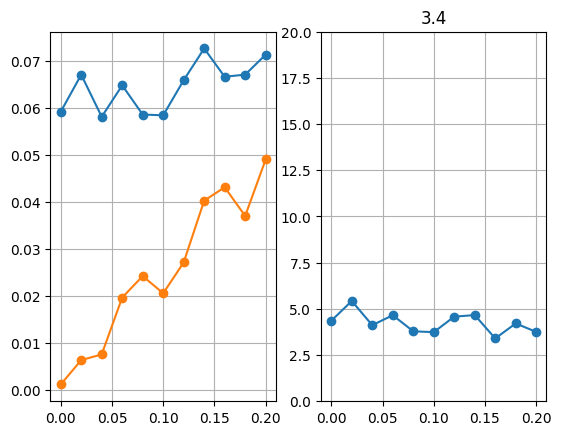

In [218]:
plt.subplot(121)
plt.plot(bs,D_rs,'o-')
plt.plot(bs,D_sigmas,'o-')
plt.grid()
plt.subplot(122)
plt.plot(bs,D_chis,'o-')
plt.grid()

plt.ylim(0,20)
plt.title(D)

In [110]:
D

1.5

In [219]:
EDM_SET[D,'t_b']  = 0.02

In [103]:
EDM_SET[1,5,'t_b']  = 1.02

In [120]:
EDM_SET[0.9,'t_b']  = 1.2

In [122]:
EDM_SET

{(0, 't_b'): 1.02,
 (0.3, 't_b'): 1.12,
 (0.6, 't_b'): 1.2,
 (0.8, 't_b'): 1.22,
 (0.7, 't_b'): 1.21,
 (1.2, 't_b'): 1.12,
 (1.5, 't_b'): 0.98,
 (0.9, 't_b'): 1.2}
















[0.02 0.18 0.46 0.62 0.7  0.76 0.85 0.98 1.12 1.2  1.22 1.21 1.2  1.12
 1.02]
[3.4 3.3 3.  2.7 2.4 2.1 1.8 1.5 1.2 0.9 0.8 0.7 0.6 0.3 0. ]


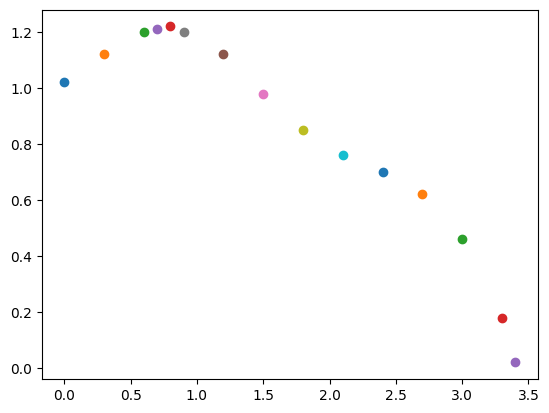

In [220]:
Ds = []
SS = []
for (D,_) in EDM_SET.keys():
    if _ == 't_b':
        plt.scatter(D,EDM_SET[D,_])
        Ds.append(D)
        SS.append(EDM_SET[D,_])
        print()
Ds = np.array(Ds)
SS = np.array(SS)
arg_Ds = np.argsort(Ds)[::-1]
SS = SS[arg_Ds]
Ds = Ds[arg_Ds]
print(SS)
print(Ds)

(0.0, 4.0)

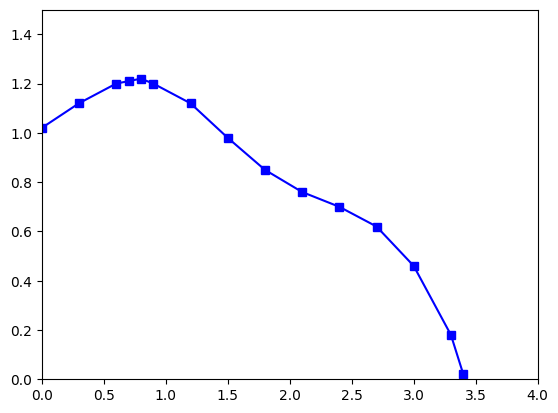

In [222]:
plt.plot(Ds,SS,'bs-')
plt.ylim(0,1.5)
plt.xlim(0,4)


In [223]:
np.savez('DATA/SF_threshold',Ds=Ds,bs = SS)